In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [39]:
pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
import re
import pandas as pd
import string
import contractions
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

In [41]:
#  read the file into a dataframe using pandas

df = pd.read_csv('/content/drive/MyDrive/ITB241 NLP/data/product_reviews.csv')
df.head()

,user_id,stars,reviews
0,A2XP9IN4JOMROD,1,I wanted to love this. I was even prepared for...
1,A2TS09JCXNV1VD,5,Grove Square Cappuccino Cups were excellent. T...
2,AJ3L5J7GN09SV,2,I bought the Grove Square hazelnut cappuccino ...
3,A3CZD34ZTUJME7,1,"I love my Keurig, and I love most of the Keuri..."
4,AWKN396SHAQGP,1,It's a powdered drink. No filter in k-cup.<br ...


#Text cleaning

In [42]:
# remove duplicate rows
df.drop_duplicates()

,user_id,stars,reviews
0,A2XP9IN4JOMROD,1,I wanted to love this. I was even prepared for...
1,A2TS09JCXNV1VD,5,Grove Square Cappuccino Cups were excellent. T...
2,AJ3L5J7GN09SV,2,I bought the Grove Square hazelnut cappuccino ...
3,A3CZD34ZTUJME7,1,"I love my Keurig, and I love most of the Keuri..."
4,AWKN396SHAQGP,1,It's a powdered drink. No filter in k-cup.<br ...
...,...,...,...
537,A398T38COTS30K,5,This is my favorite K-Cup flavor. I like my c...
538,A1B410YK9O18XZ,5,If you are looking for the taste of French Van...
539,A1W85A81467TCW,5,I have purchased and used 3 boxes of the Hazel...
540,A103FOM06QPAX8,5,"Yummy, great tasting and very convenient. Onl..."


In [43]:
 # expand contractions

expanded = [contractions.fix(i) for i in df['reviews']]
df['reviews'] = expanded

df.head()


,user_id,stars,reviews
0,A2XP9IN4JOMROD,1,I wanted to love this. I was even prepared for...
1,A2TS09JCXNV1VD,5,Grove Square Cappuccino Cups were excellent. T...
2,AJ3L5J7GN09SV,2,I bought the Grove Square hazelnut cappuccino ...
3,A3CZD34ZTUJME7,1,"I love my Keurig, and I love most of the Keuri..."
4,AWKN396SHAQGP,1,It is a powdered drink. No filter in k-cup.<br...


In [44]:
# remove html in reviews
df['reviews'] = [re.sub('<[^<>]*>', ' ',i) for i in df['reviews']]

# remove punctuation
punctuation = '[' + re.escape(string.punctuation)+']'
df['reviews'] = [re.sub(punctuation, '',i) for i in df['reviews']]

# change all reviews to lowercase
df['reviews'] = [i.lower() for i in df['reviews']]

In [45]:
# check that html and punctuation is removed, and all characters are lowercase
df['reviews'][4]

'it is a powdered drink no filter in kcup just buy it in bulk and mix it with hot water  nothing else to say here will not be buying it again'

In [46]:
# remove words that contain numbers
# remove numbers

print(df['reviews'][42], '\n')

new_list = [re.sub(r"\w*\d\w*\d*\w*",'',s).strip() for s in df['reviews']]
df['reviews'] = new_list

# check that words with numbers have been removed
df['reviews'][42]

b005k4q1ya  this is just plain nasty tasting had to cancel subscription the artificial sweetener is very overbearing and made the weak coffee taste like apple peelings 



'this is just plain nasty tasting had to cancel subscription the artificial sweetener is very overbearing and made the weak coffee taste like apple peelings'

In [47]:
# count number of reviews
reviewcount = len(df['reviews'])
reviewcount


542

###Sentence tokenize and word tokenize reviews

In [48]:
# sentence tokens and word tokens [2-step tokenization] of each review

df['sent_review'] = ''
df['words_review'] = ''

for i in df.index:
  df['sent_review'][i] = sent_tokenize(df['reviews'][i])
  df['words_review'][i] = [word_tokenize(w) for w in df['sent_review'][i]]

df.head()

<ipython-input-48-c1141d14269c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sent_review'][i] = sent_tokenize(df['reviews'][i])
<ipython-input-48-c1141d14269c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['words_review'][i] = [word_tokenize(w) for w in df['sent_review'][i]]


,user_id,stars,reviews,sent_review,words_review
0,A2XP9IN4JOMROD,1,i wanted to love this i was even prepared for ...,[i wanted to love this i was even prepared for...,"[[i, wanted, to, love, this, i, was, even, pre..."
1,A2TS09JCXNV1VD,5,grove square cappuccino cups were excellent ta...,[grove square cappuccino cups were excellent t...,"[[grove, square, cappuccino, cups, were, excel..."
2,AJ3L5J7GN09SV,2,i bought the grove square hazelnut cappuccino ...,[i bought the grove square hazelnut cappuccino...,"[[i, bought, the, grove, square, hazelnut, cap..."
3,A3CZD34ZTUJME7,1,i love my keurig and i love most of the keurig...,[i love my keurig and i love most of the keuri...,"[[i, love, my, keurig, and, i, love, most, of,..."
4,AWKN396SHAQGP,1,it is a powdered drink no filter in kcup just ...,[it is a powdered drink no filter in kcup just...,"[[it, is, a, powdered, drink, no, filter, in, ..."


###Remove stop words, lemmatize and stemming

In [49]:
# remove punctuation and stop words
# lemmatize and stemming of words


from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()
from nltk.stem import PorterStemmer
ps = PorterStemmer()

stopwordlist = list(stopwords.words('english'))
stopwordlist.remove('not')



for i, item in enumerate(df['words_review']):
  for w in range(len(item)):
    
    nostop = [t for t in item[w] if t not in stopwordlist]

    nostop =[lem.lemmatize(t, pos='v') for t in nostop]
    nostop =[lem.lemmatize(t, pos='a') for t in nostop]
    nostop =[lem.lemmatize(t, pos='s') for t in nostop]
    nostop =[lem.lemmatize(t, pos='r') for t in nostop]
    nostop =[lem.lemmatize(t, pos='n') for t in nostop]
    nostop = [ps.stem(t) for t in nostop]
    item[w] = nostop

----
###Create bigrams from word tokens, 'words_review'

In [50]:
from nltk.util import ngrams
# bi-grams

df['bigram_tokens'] = ''

for i in df.index:
  df['bigram_tokens'][i] = [list(ngrams(n, 2)) for n in df['words_review'][i]]

  for b in range(len(df['bigram_tokens'][i])):
    df['bigram_tokens'][i][b] = ['_'.join(t) for t in df['bigram_tokens'][i][b]]


df.head()

<ipython-input-50-e492d2eab3f0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bigram_tokens'][i] = [list(ngrams(n, 2)) for n in df['words_review'][i]]


,user_id,stars,reviews,sent_review,words_review,bigram_tokens
0,A2XP9IN4JOMROD,1,i wanted to love this i was even prepared for ...,[i wanted to love this i was even prepared for...,"[[want, love, even, prepar, somewhat, like, ch...","[[want_love, love_even, even_prepar, prepar_so..."
1,A2TS09JCXNV1VD,5,grove square cappuccino cups were excellent ta...,[grove square cappuccino cups were excellent t...,"[[grove, squar, cappuccino, cup, excel, tast, ...","[[grove_squar, squar_cappuccino, cappuccino_cu..."
2,AJ3L5J7GN09SV,2,i bought the grove square hazelnut cappuccino ...,[i bought the grove square hazelnut cappuccino...,"[[buy, grove, squar, hazelnut, cappuccino, kcu...","[[buy_grove, grove_squar, squar_hazelnut, haze..."
3,A3CZD34ZTUJME7,1,i love my keurig and i love most of the keurig...,[i love my keurig and i love most of the keuri...,"[[love, keurig, love, keurig, coffe, instant, ...","[[love_keurig, keurig_love, love_keurig, keuri..."
4,AWKN396SHAQGP,1,it is a powdered drink no filter in kcup just ...,[it is a powdered drink no filter in kcup just...,"[[powder, drink, filter, kcup, buy, bulk, mix,...","[[powder_drink, drink_filter, filter_kcup, kcu..."


###Reviews word distribution

In [51]:
from nltk.probability import FreqDist

wt_words = df['words_review']

df['freq_word'] = ''

# generate frequency for all the words
for i, item in enumerate(df['words_review']):

  freq = []
  for w in item:

    freq_dist = nltk.FreqDist(w)
    check_dict = dict(freq_dist)
    freq.append(check_dict)
    
  df['freq_word'][i] = freq



<ipython-input-51-47910c9b9fa2>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['freq_word'][i] = freq


In [52]:

# combining dictionaries
# using dict() and items()
final_freq = df['freq_word'][0][0]

# where d is a list
for d in range(1, len(df['freq_word'])):
  final_freq = {x: final_freq.get(x, 0) + df['freq_word'][d][0].get(x, 0) for x in set(final_freq).union(df['freq_word'][d][0])}



In [53]:
len(final_freq)

1775

----
###Plot frequency ditribution and word cloud for reviews




In [54]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


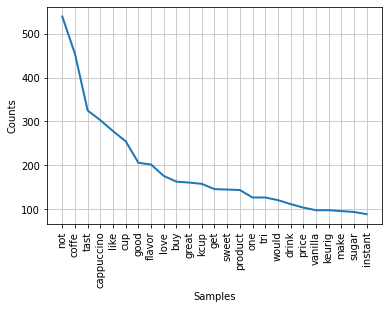

In [55]:
# plot the frequency distribution of the top 25 words

sorted_freqdist = FreqDist(final_freq)
sorted_freqdist.plot(25, cumulative=False)

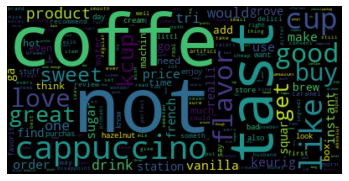

In [56]:
# build wordcloud

from wordcloud import WordCloud
wcloud = WordCloud().generate_from_frequencies(sorted_freqdist)

# plot the wordcloud
import matplotlib.pyplot as plt
plt.imshow(wcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

The frequency distribution and word cloud show that the five most frequently mentioned words are not, coffee, taste, cappuccino and like. However, words like "not", "cup" and "one" will not help in the analysis of unigrams due to the neutral sentiment of such words, and therefore are not a good representation of the sentiment in the reviews.


Hence, I decided to remove words with three characters or less, to reduce noise in the analysis of unigrams.

----
###Remove words with 3 characters or less and plot frequency distribution and word cloud

In [57]:
for i, item in enumerate(df['words_review']):
  for w in range(len(item)):

    # consider words that have more than 3 characters
    nostop = [t for t in item[w] if len(t)>3]
    item[w] = nostop

<ipython-input-58-e30421b7fbb5>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['freq_word'][i] = freq


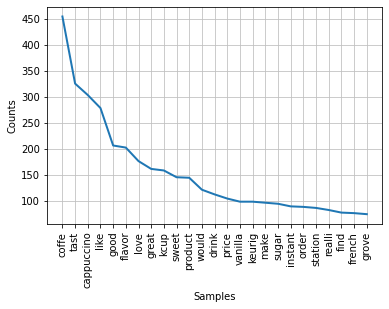

In [58]:

wt_words = df['words_review']

df['freq_word'] = ''

# generate frequency for all the words
for i, item in enumerate(df['words_review']):

  freq = []
  for w in item:

    freq_dist = nltk.FreqDist(w)
    check_dict = dict(freq_dist)
    freq.append(check_dict)
    
  df['freq_word'][i] = freq


# combining dictionaries
# using dict() and items()
final_freq = df['freq_word'][0][0]

# where i is a list
for d in range(1, len(df['freq_word'])):
  final_freq = {x: final_freq.get(x, 0) + df['freq_word'][d][0].get(x, 0) for x in set(final_freq).union(df['freq_word'][d][0])}


# plot the frequency distribution of the top 25 words
sorted_freqdist = FreqDist(final_freq)
sorted_freqdist.plot(25, cumulative=False)

The frequency distribution gives a visual representation of the difference in frequency of the terms.

As seen in the graph, the count of the top five terms are more than 150, which is significantly higher than the count of all other terms.

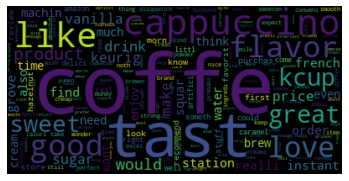

In [59]:
# build wordcloud after removing words with 3 characters or less

from wordcloud import WordCloud
wcloud = WordCloud().generate_from_frequencies(sorted_freqdist)

# plot the wordcloud
import matplotlib.pyplot as plt
plt.imshow(wcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

After removing words with 3 characters or less, the five most frequent words based on the frequency distribution and word cloud is coffee, taste, cappuccino,like and good.
This is a representation that many reviews are comparing the coffee by using the phrase 'coffee taste like' or 'cappuccino good'.

This also means that many reviews have the word 'like'. The word is a polysemous word that could be used as a comparative word in 'this tastes like ' or to carry a positive meaning in 'I like this coffee'.

To counter this problem where there are polysemous words, I have decided to use bi-grams so that the meaning of phrases can be retained.

------
###Bigram distribution

In [60]:

wt_words = df['bigram_tokens']

df['freq_bigram'] = ''

# generate frequency for all the words
for i, item in enumerate(df['bigram_tokens']):

  freq = []
  for t in item:

    freq_b = nltk.FreqDist(t)
    freq.append(dict(freq_b))
    
    df['freq_bigram'][i] = freq


<ipython-input-60-1267ded95ea0>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['freq_bigram'][i] = freq


In [61]:
# combining dictionaries
# using dict() and items()
final_b = df['freq_bigram'][0][0]

# where i is a list
for d in range(1, len(df['freq_bigram'])):
  final_b = {x: final_b.get(x, 0) + df['freq_bigram'][d][0].get(x, 0) for x in set(final_b).union(df['freq_bigram'][d][0])}

sorted_freqb = FreqDist(final_b)

In [62]:
# how many bi-grams are there?
len(final_b)

9124

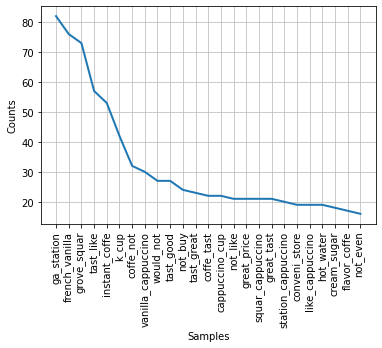

In [63]:
sorted_freqb = FreqDist(final_b)
sorted_freqb.plot(25, cumulative=False)

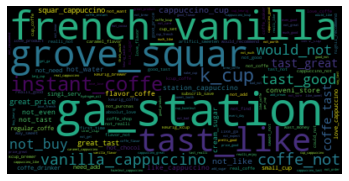

In [64]:
# build wordcloud
from wordcloud import WordCloud
wcloud = WordCloud().generate_from_frequencies(sorted_freqb)

# plot the wordcloud
import matplotlib.pyplot as plt
plt.imshow(wcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

The word cloud and frequency distribution shows that the top bi-grams are gas_station, french_vanilla, grove_square, taste_like and instant_coffee.

This shows that most reviews mention the french vanilla flavour, and that 'grove square' drinks 'tastes like' 'instant coffee' or 'gas station' coffee.

It is evident that the usage of bi-grams has helped in showing the top few phrases which carry much more meaning than the top few uni-grams, allowing for a more deeper and meaningful analysis of the reviews.

----
###Network graph reviews

In [65]:
!pip install textnets
# restart kernel to use module textnets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pandas-1.5.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.2 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.0
    Uninstalling pandas-1.3.0:
      Successfully uninstalled pandas-1.3.0


In [66]:
!python -m spacy download en_core_web_sm

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2022-12-15 02:21:33.557304: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 4.8 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [67]:
# import library
import textnets as tn

# fixed seed for reproducible
tn.params['seed']=42

corpus = tn.Corpus.from_df(df, doc_col="reviews")
corpus

<Corpus with 542 documents using language model 'en_core_web_sm'>

  0%|          | 0/542 [00:00<?, ?docs/s]

  0%|          | 0/528 [00:00<?, ?edges/s]

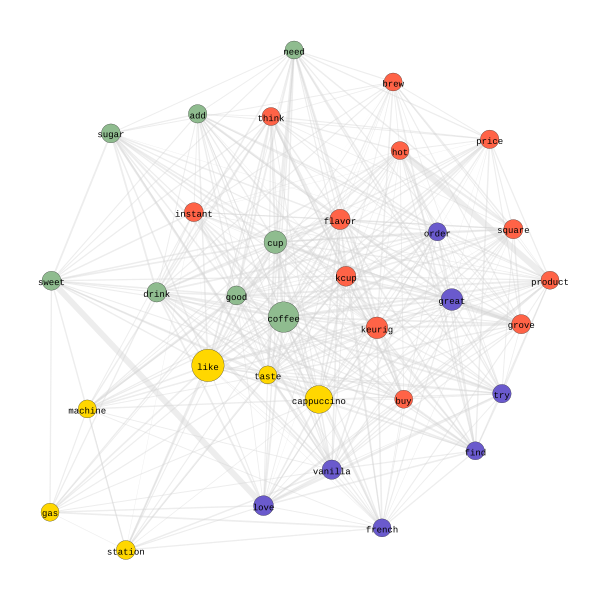

In [68]:
# create textnet, min docs = 50
t = tn.Textnet(corpus.tokenized(), min_docs=50)

# create term network
words = t.project(node_type="term")


# plot the term network
words.plot(label_nodes=True,
           scale_nodes_by="betweenness",
           color_clusters=True,
           alpha=0.42,
           edge_width=[0.1*w for w in words.edges["weight"]], # line weight
           edge_opacity=0.4)
          #  node_label_filter=lambda n: n.betweenness() > words.betweenness.median()) # if lower than score, dont show label

From the term network, we can clearly see which terms are in a cluster. 
Hence, the conlusions I can draw from this are...
1. green = The coffee tastes good but customers feel the need to add sugar.
2. yellow = The cappuccino drink tastes like the coffee machine at gas stations.
3. purple = The french vanilla flavour is loved and customers would recommend others to try it.
4. red = customers think that grove square, kcup and keurig has great prices and the drinks tast like instant brew.

###Stars distribution

In [69]:
# put all stars into a list
starlist = list(df['stars'])

# print(starlist)

# count number of each star
def countingstars():
  starcount =[]

  star1 = starlist.count(1)
  star2 = starlist.count(2)
  star3 = starlist.count(3)
  star4 = starlist.count(4)
  star5 = starlist.count(5)

  starcount.append(star1)
  starcount.append(star2)
  starcount.append(star3)
  starcount.append(star4)
  starcount.append(star5)

  starname = ['1star', '2star', '3star', '4star', '5star']
  stard = dict(zip(starname, starcount))

  return stard

# calculate pecentage of each star
def percentage(s):
  return s/len(starlist)*100

# print statements
def statements(allstars):
  print(len(starlist), 'reviews in total')

  for i, s in allstars.items():
    print(s, ", {:.2f}%".format(percentage(s)), 'of reviews are', i, '\n')

# count stars
allstars = countingstars() 

# print results
statements(allstars)
# print(countingstars())

542 reviews in total
96 , 17.71% of reviews are 1star 

45 , 8.30% of reviews are 2star 

28 , 5.17% of reviews are 3star 

65 , 11.99% of reviews are 4star 

308 , 56.83% of reviews are 5star 



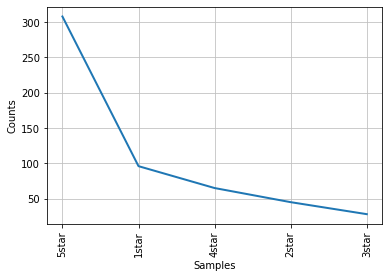

In [70]:
sorted_star = FreqDist(allstars)
sorted_star.plot(50, cumulative=False)

The line graph shows that there are a large amount of 5 star reviews as compared to other reviews. As seen in the previous analysis, 56.83% of reviews are 5 star which is more than half of the total reviews.


However, 1 star reviews have the second highest amomunt of reviews.
This shows that although most customers are very satisfied with their experience, there are still a significant number of customers who were very unsatisfied with their experience.

###Save cleaned data

In [72]:
df.to_csv('/content/drive/MyDrive/ITB241 NLP/cleaned_product_review.csv')